# TP08 : Clustering algorithms

Student names:
- Dan Yvan Baumgartner
- Jan Huber

In [3]:
import pickle
import numpy as np             
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

## Exercice 1 : Getting the data

### a) Load the two given datasets

In [4]:
X1,label1 = pd.read_pickle("dataset_1.pkl")
X2,label2 = pd.read_pickle("dataset_2.pkl")

### b) Visualize the data using various color for each unique labels

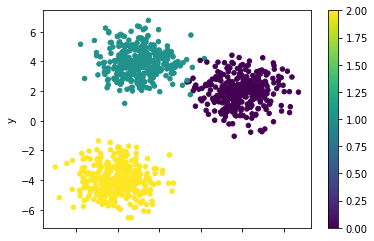

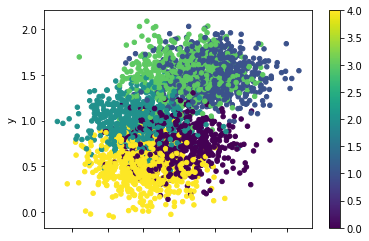

In [5]:
df1 = pd.DataFrame({'x':X1[:,0],'y':X1[:,1],'label':label1})
df1.plot.scatter(x='x',y='y',c=label1,colormap='viridis')
df2 = pd.DataFrame({'x':X2[:,0],'y':X2[:,1],'label':label2})
df2.plot.scatter(x='x',y='y',c=label2,colormap='viridis')

## Exercice 2 : The $k$-means algorithm
Using numpy, implements the
$k$-means algorithm as follow :

1. Initialise the centroids $\mu_1,\mu_2,\dots,\mu_k$.
2. Until convergence :
  1. Find the closest centroid for each point
  2. Reevaluate the centroids
3. Return the centroids and the label predicted.


We also ask you to define and implement strategies for the :
- **Initialisation of the centroids : ** $k$ random values among the dataset have been chosen as centroids
- **Convergence criteria :** The algorithm is stopped when the objective function $J(c,\mu)=\sum \limits_{n=1}^{N}d(x_n,\mu_{c_n})$ is converging, i.e : when $|J[n]-J[n-1]| < \epsilon$.

In [22]:
def kmeans(points,k,eps=0.01):
    # Initialise the centroids
    centroids = points.copy()
    np.random.shuffle(centroids)
    centroids = centroids[:k]
    dJ = eps+1
    lastJ = 0
    J_i = []
    
    while abs(dJ) > eps:
        # Find closest centroid
        distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))
        closest = np.argmin(distances,axis=0)

        # Reevaluate the centroids
        centroids = np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])
        
        # Compute distortion
        J = np.sum(np.linalg.norm(points-centroids[closest]))
        dJ = J-lastJ
        lastJ = J
        J_i.append(J)
        
    
    return closest,J_i,centroids

## Exercice 3 : Evaluate your model

### a) Visualize your convergence criteria over the epochs using the dataset 1.

Text(0.5,0,'epoch')

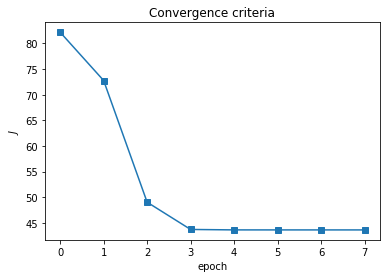

In [23]:
lk,J_i,c = kmeans(X1,3,0.000001)
plt.plot(range(len(J_i)),J_i,'-s')
plt.title('Convergence criteria')
plt.ylabel('$J$')
plt.xlabel('epoch')

### b) Visualize the output of your $k$-means on the dataset 1.

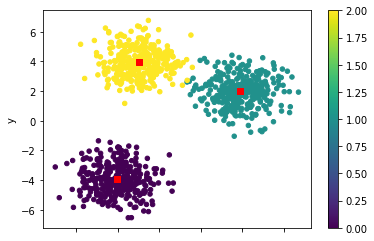

In [31]:
df1.plot.scatter(x='x',y='y',c=lk,colormap='viridis')
plt.scatter(c[:, 0], c[:, 1], color='r', marker='s')

### c) Do you experience sensitivity to the initial values of the centroids ? Is your strategy for initialization working well in most cases ?

In the cell below, the kmeans is launched 10 times with the same dataset. In some results, the classifier is stuck in a local minima. That means that this model is sensible to the initial state of the centroids.

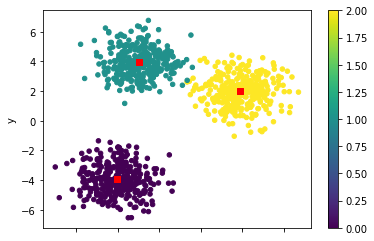

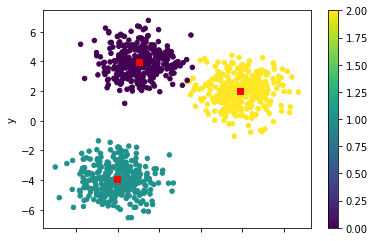

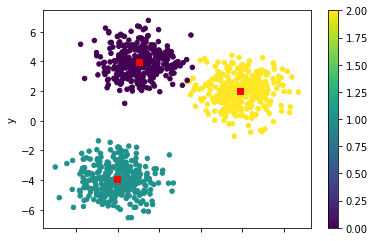

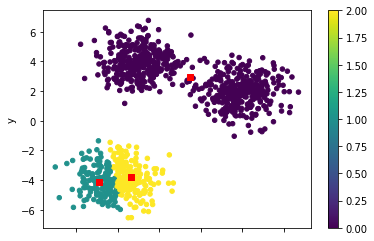

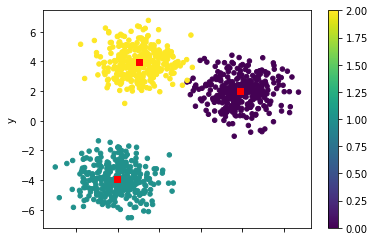

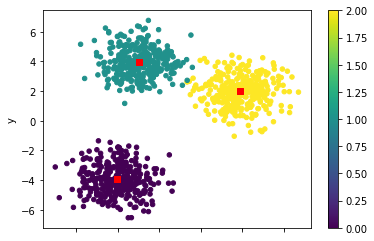

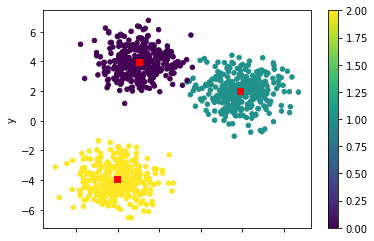

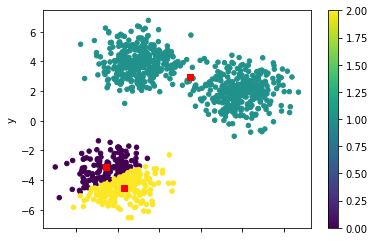

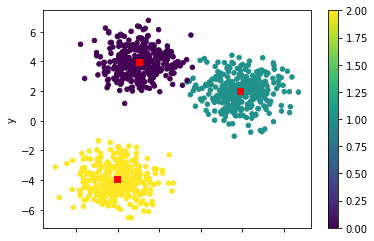

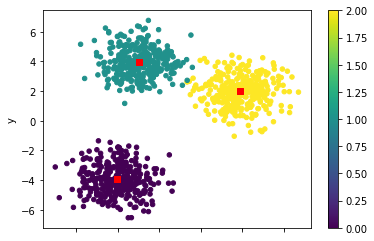

In [33]:
nb_test = 10
for i in range(nb_test):
    lk,J_i,c = kmeans(X1,3,0.000001)
    df1.plot.scatter(x='x',y='y',c=lk,colormap='viridis')
    plt.scatter(c[:, 0], c[:, 1], color='r', marker='s')

### d) Document your convergence criteria. Could you think about other convergence criteria ?

The model that is used is guarenteed to converge. However, it is not possible to tell if the model is stuck in a local minima.

### e) Visualize your convergence criteria over time using the dataset 2.

Text(0.5,0,'epoch')

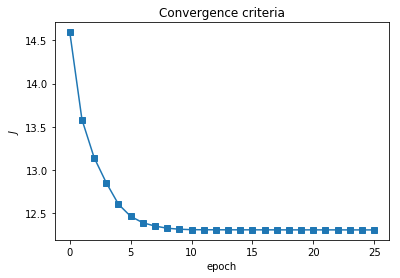

In [35]:
lk2,J_i2,c2 = kmeans(X2,5,0.000001)
plt.plot(range(len(J_i2)),J_i2,'-s')
plt.title('Convergence criteria')
plt.ylabel('$J$')
plt.xlabel('epoch')

### f) Visualize the output of your $k$-means on the dataset 2 and comment your results.

The algorithm doesn't work for the dataset 2, because there is not some clear clusters in the feature space. Therefore, the model is strictly dependent of the initial values. And the result is a Voronoi diagram were the centroids are the centers of the Voronoi regions and the labels corresponds to the Voronoi regions.

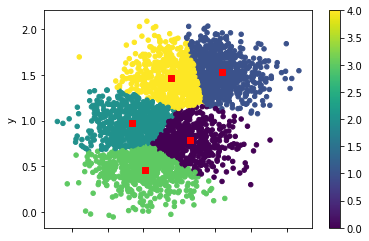

In [36]:
df2.plot.scatter(x='x',y='y',c=lk2,colormap='viridis')
plt.scatter(c2[:, 0], c2[:, 1], color='r', marker='s')